# Title Page
## **Chosen Dataset:  California Housing Dataset**


**UPLOADING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
url = ('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
df1 = pd.read_csv(url)
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **PART 1: DATA EXPLORATION AND PREPARATION WITH VISUALIZATIONS AND DOCUMENTATION**

## **1. STATISTICAL TESTS AND DATA CLEANING**

In [ ]:
df = df1.copy()

In [ ]:
df = df1.copy()

In [ ]:
df.shape

(20640, 10)

In [ ]:
null_values = df.isnull().sum()
null_values

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## **2. REMOVING MISSING VALUES**

In [ ]:
# Total bedrooms
print('total number of null values:',  df['total_bedrooms'].isnull().sum())
df['total_bedrooms'] =df['total_bedrooms'].fillna(df['total_bedrooms'].median())
print('total number of null values after filling with median: ', df['total_bedrooms'].isnull().sum())

total number of null values: 207
total number of null values after filling with median:  0


## **3. EXPLORATORY DATA ANALYSIS**

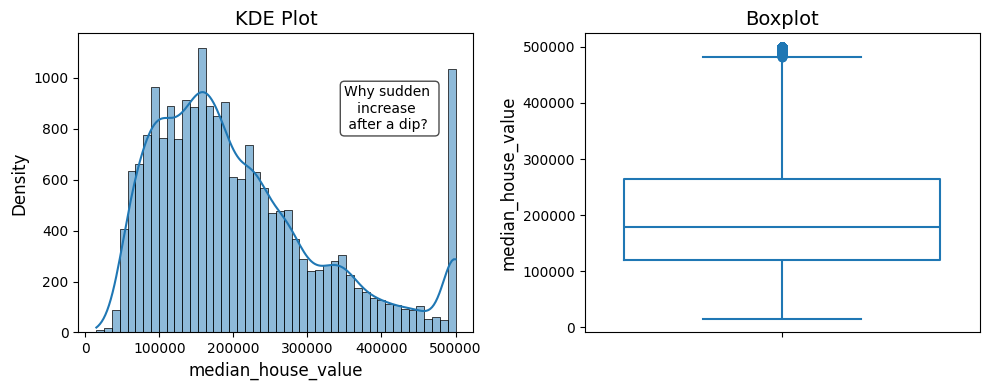

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(df['median_house_value'], kde= True, fill = True, ax=axes[0])
axes[0].set_title("KDE Plot", fontsize=14)
axes[0].set_xlabel("median_house_value" , fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)

axes[0].text(350000, 800, "Why sudden \n   increase \n after a dip?",
             fontsize=10, color='black',
             bbox=dict(boxstyle="round", fc="white", alpha=0.7))

sns.boxplot(df['median_house_value'], fill = False, ax=axes[1])
axes[1].set_title("Boxplot", fontsize=14)
axes[1].set_ylabel("median_house_value", fontsize=12)


plt.tight_layout()
plt.show()

This shows distribution of the house price which have means near **200000 us dollars**. There are some outlier as well, showing very high price values which may be true.

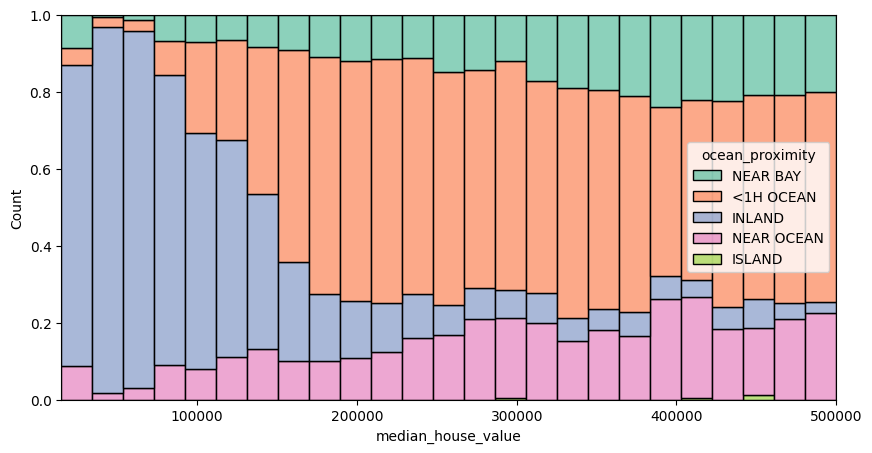

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x= 'median_house_value', bins = 25, hue = 'ocean_proximity',fill = True, multiple='fill', palette="Set2")
plt.show()

This show **price of the house increase when move towards coast** form the hinterland.

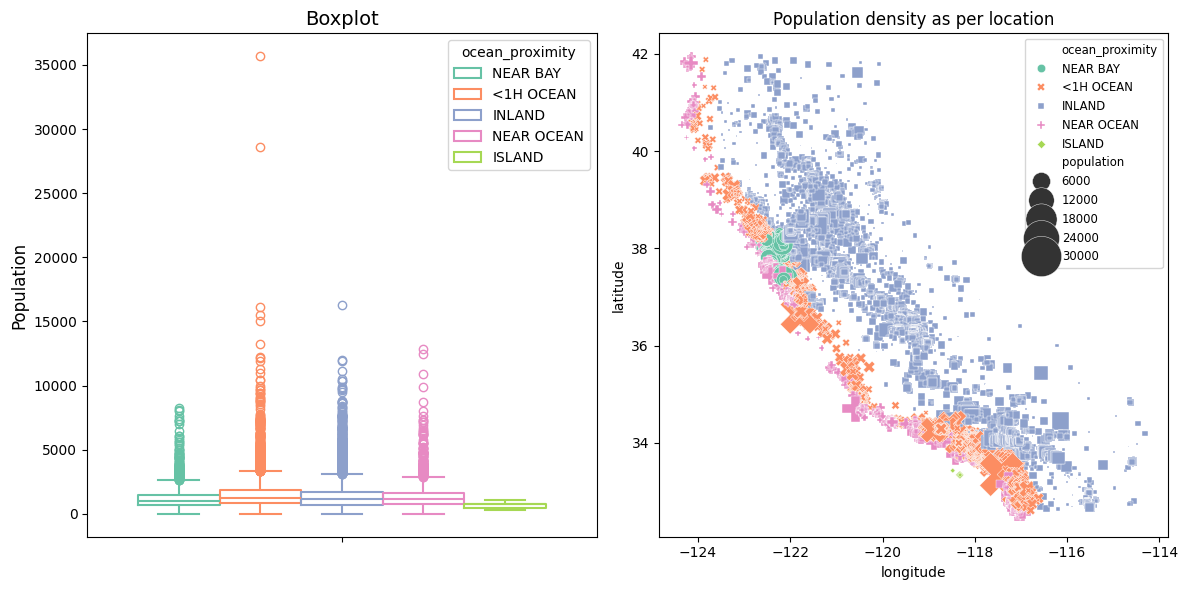

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.boxplot(data=df, y="population", fill = False, hue='ocean_proximity',  palette= 'Set2', ax=axes[0])
axes[0].set_title("Boxplot", fontsize=14)
axes[0].set_ylabel("Population", fontsize=12)

sns.scatterplot(df, x = 'longitude', y = 'latitude', hue ='ocean_proximity', palette='Set2', style = 'ocean_proximity',
size = 'population', sizes = (1, 1000), hue_norm=(1,2), ax=axes[1] )
axes[1].set_xlabel('longitude')
axes[1].set_ylabel('latitude')
axes[1].set_title('Population density as per location')
axes[1].legend(loc='upper right', fontsize= 'small')


#sns.kdeplot(data=df, x="population", fill=True, ax=axes[1])
#axes[1].set_title("KDE Plot", fontsize=14)
#axes[1].set_xlabel("Population", fontsize=12)
#axes[1].set_ylabel("Density", fontsize=12)

plt.tight_layout()
plt.show()

High population societies found near **coastal areas as well as region 1 hour away** from the coast.

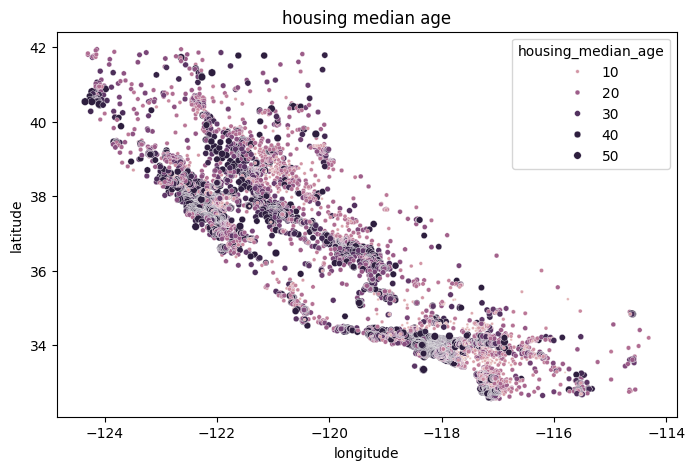

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(df, x = 'longitude', y = 'latitude', hue ='housing_median_age', size= 'housing_median_age',
sizes =(2,30 ), hue_norm=(1,35) )
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('housing median age')
plt.show()

It show state has both old as well as new housing societies.

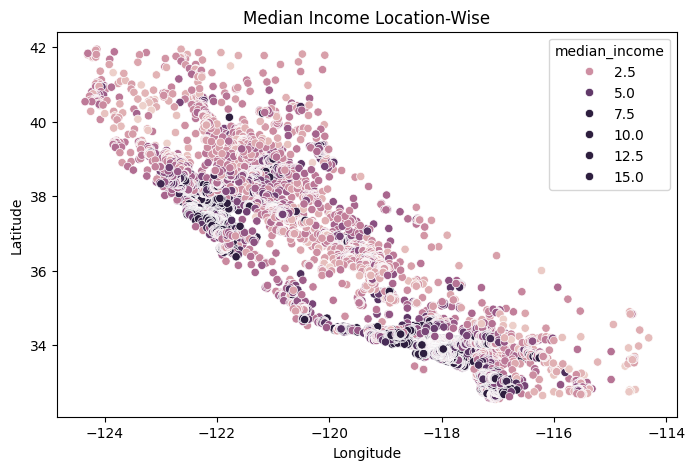

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(df, x = 'longitude', y= 'latitude', hue ='median_income',  hue_norm=(1,6))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Median Income Location-Wise')
plt.show()

It shows **most of the rich people live near coastal region**.

<Axes: xlabel='median_income', ylabel='median_house_value'>

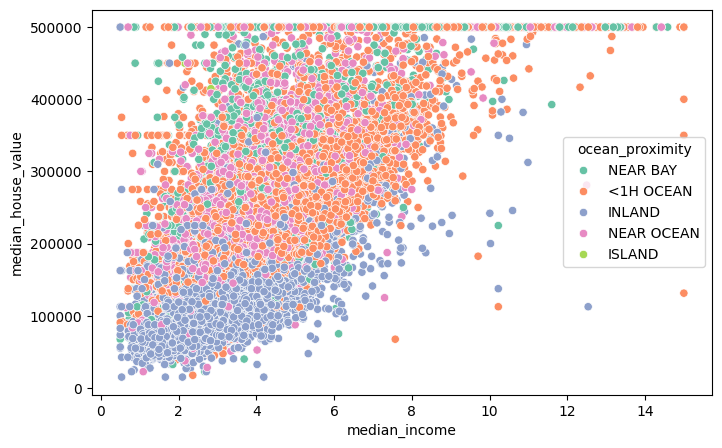

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(df, x='median_income', y='median_house_value', hue='ocean_proximity', palette='Set2')


In [ ]:
from seaborn.external import kde
df['income_bin'] = pd.cut(df["median_income"], bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
df.groupby('income_bin')['population'].count()

/tmp/ipython-input-3452956446.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('income_bin')['population'].count()


,population
income_bin,
"(1, 2]",2298
"(2, 3]",4946
"(3, 4]",5150
"(4, 5]",3598
"(5, 6]",2127
"(6, 7]",1163
"(7, 8]",509
"(8, 9]",283
"(9, 10]",99


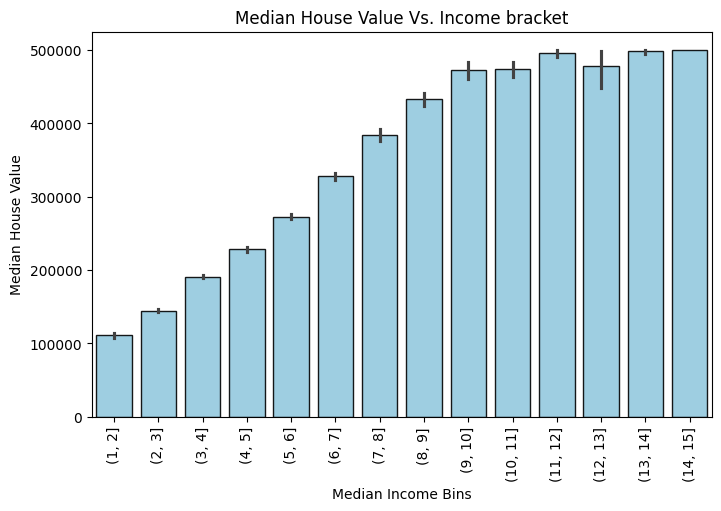

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='income_bin',y="median_house_value",  alpha = 0.9, edgecolor = "black", color ="skyblue")
plt.xticks( rotation=90)
plt.xlabel("Median Income Bins")
plt.ylabel("Median House Value")
plt.title("Median House Value Vs. Income bracket")


plt.show()

It shows that **income influences the standard of living** (expensive housing society).

## **4. CORRELATION, OUTLIER AND SKEWNESS TEST**

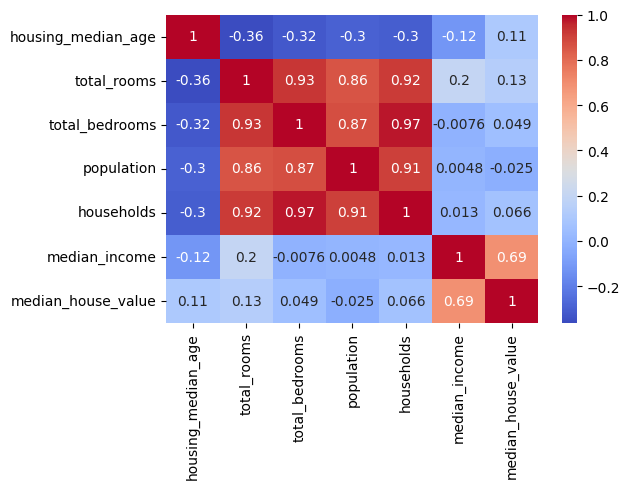

In [ ]:
numeric_df = df.select_dtypes(include='number').drop(columns=['longitude','latitude'])
heatmap_df = numeric_df.corr()
plt.figure(figsize = (6,4))
sns.heatmap(heatmap_df, annot = True, cmap = 'coolwarm')
plt.show()

It shows that many features like **bedroom, total room etc** have high correlation and they can affect the model.

In [ ]:
df = df.drop('income_bin', axis=1)
missing_df = df.isnull().sum()

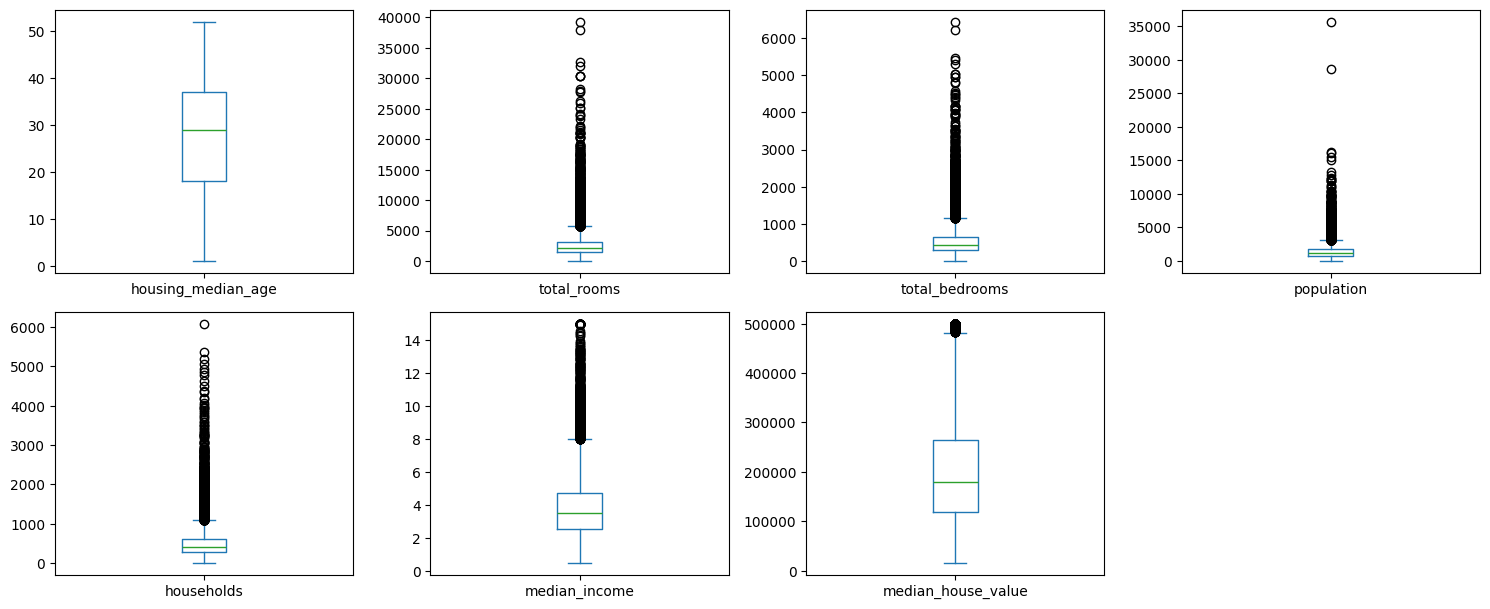

In [ ]:
numeric_df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


It shows that many numerical features have so many outliers which may affect the distance based model like linear regression model.

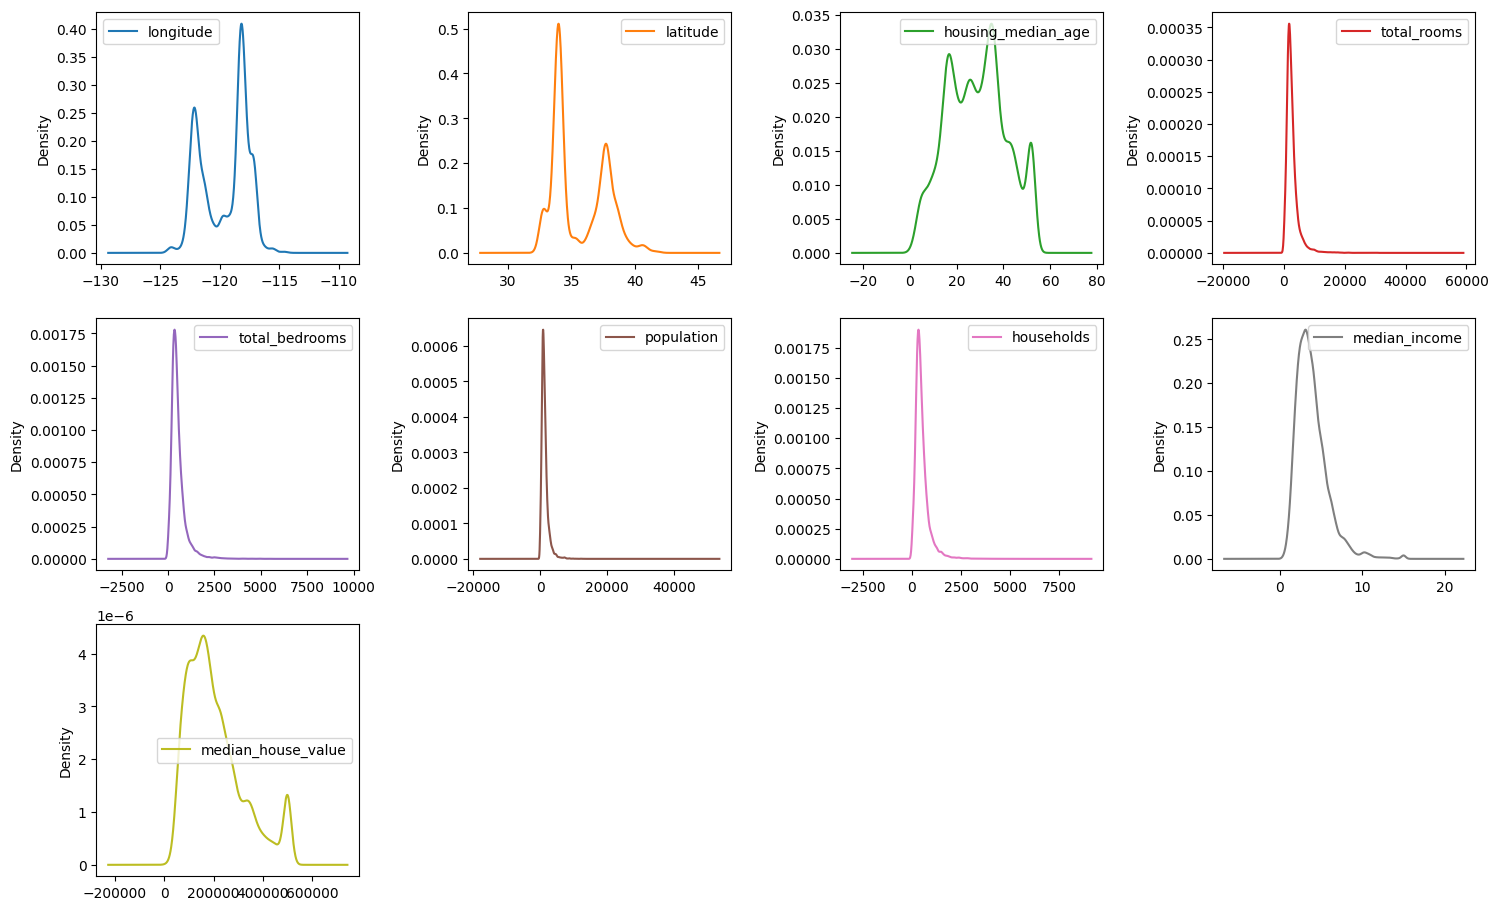

In [ ]:
numeric_df = df.select_dtypes(include='number')
#.drop(columns=['longitude','latitude'])
numeric_df.plot(kind='kde', subplots=True, layout=(4,4), figsize=(15,12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [ ]:
numeric_df.skew()

,0
longitude,-0.297801
latitude,0.465953
housing_median_age,0.060331
total_rooms,4.147343
total_bedrooms,3.481141
population,4.935858
households,3.410438
median_income,1.646657
median_house_value,0.977763


In [ ]:
numeric_df.var()

,0
longitude,4.014139e+00
latitude,4.562293e+00
housing_median_age,1.583963e+02
total_rooms,4.759445e+06
total_bedrooms,1.758895e+05
population,1.282470e+06
households,1.461760e+05
median_income,3.609323e+00
median_house_value,1.331615e+10


This shows skewness and unscaled features which which will be solved by applying power transformation using Yeo-johnson method as it works well on negative as well as zero values.

In [ ]:
pt = PowerTransformer(method = 'yeo-johnson')
transformed_df = pt.fit_transform(numeric_df)

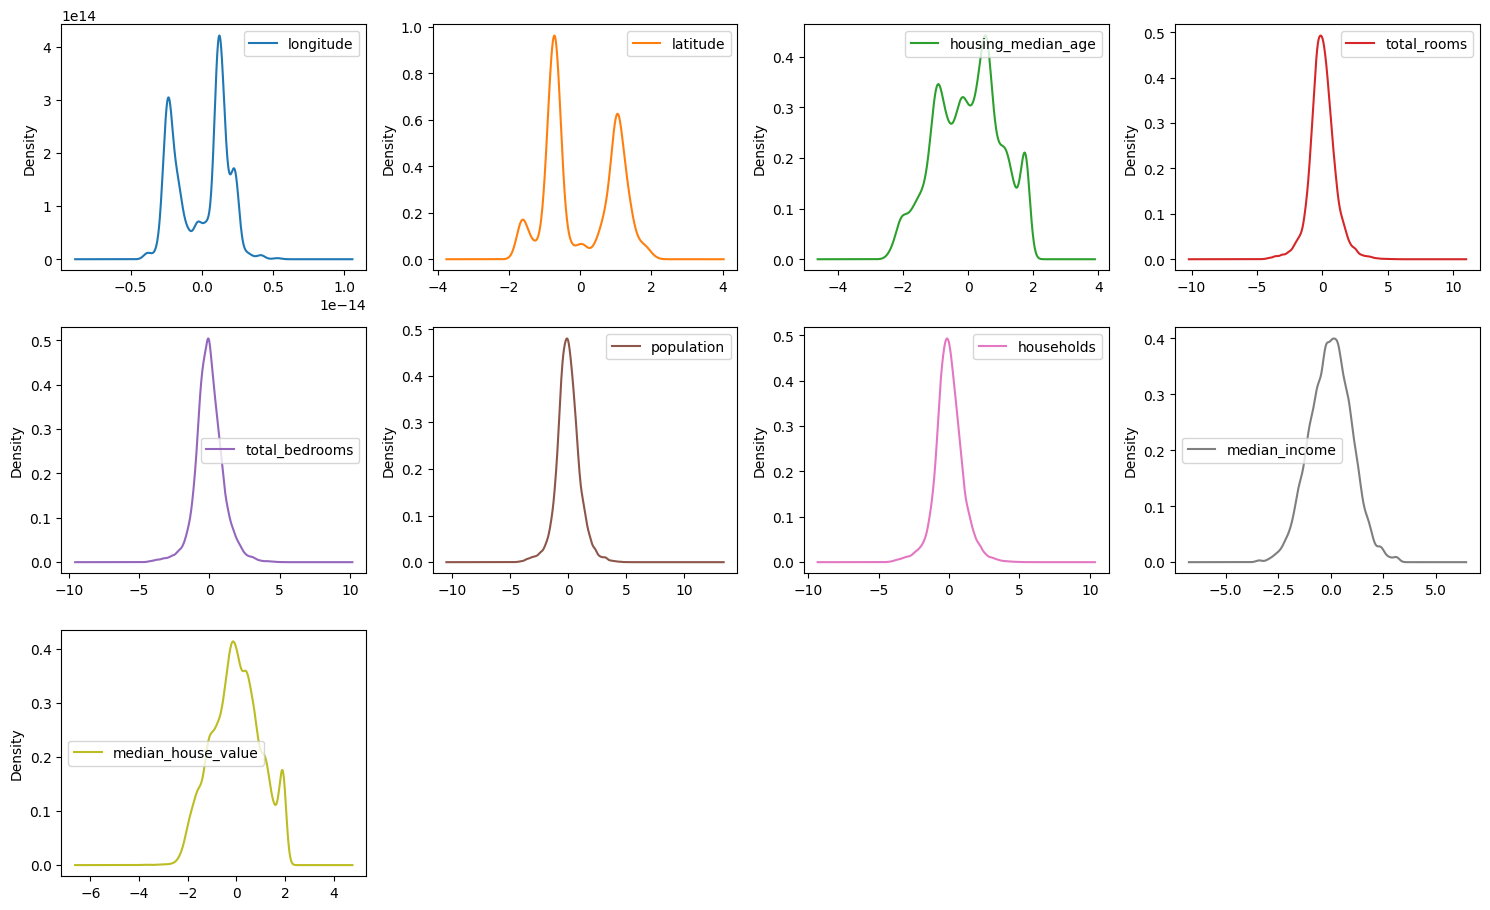

In [ ]:
transformed_df = pd.DataFrame(transformed_df, columns=numeric_df.columns)
transformed_df.plot(kind='kde', subplots=True, layout=(4,4), figsize=(15,12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [ ]:
print(transformed_df.skew())

longitude             0.000000
latitude              0.153850
housing_median_age   -0.113089
total_rooms           0.121378
total_bedrooms        0.107957
population            0.110641
households            0.109520
median_income        -0.002538
median_house_value   -0.012149
dtype: float64


In [ ]:
print(transformed_df.var())

longitude             3.443219e-30
latitude              1.000048e+00
housing_median_age    1.000048e+00
total_rooms           1.000048e+00
total_bedrooms        1.000048e+00
population            1.000048e+00
households            1.000048e+00
median_income         1.000048e+00
median_house_value    1.000048e+00
dtype: float64


Here we identified the skewness and variances of the features and reduce it using **Yeo-Johnson method**. It has improved the bell curved of the features and has also reduced the variance the features. Reduced skewness and varience can also be seen above.

## **5. SCALING OF THE FEATURES**

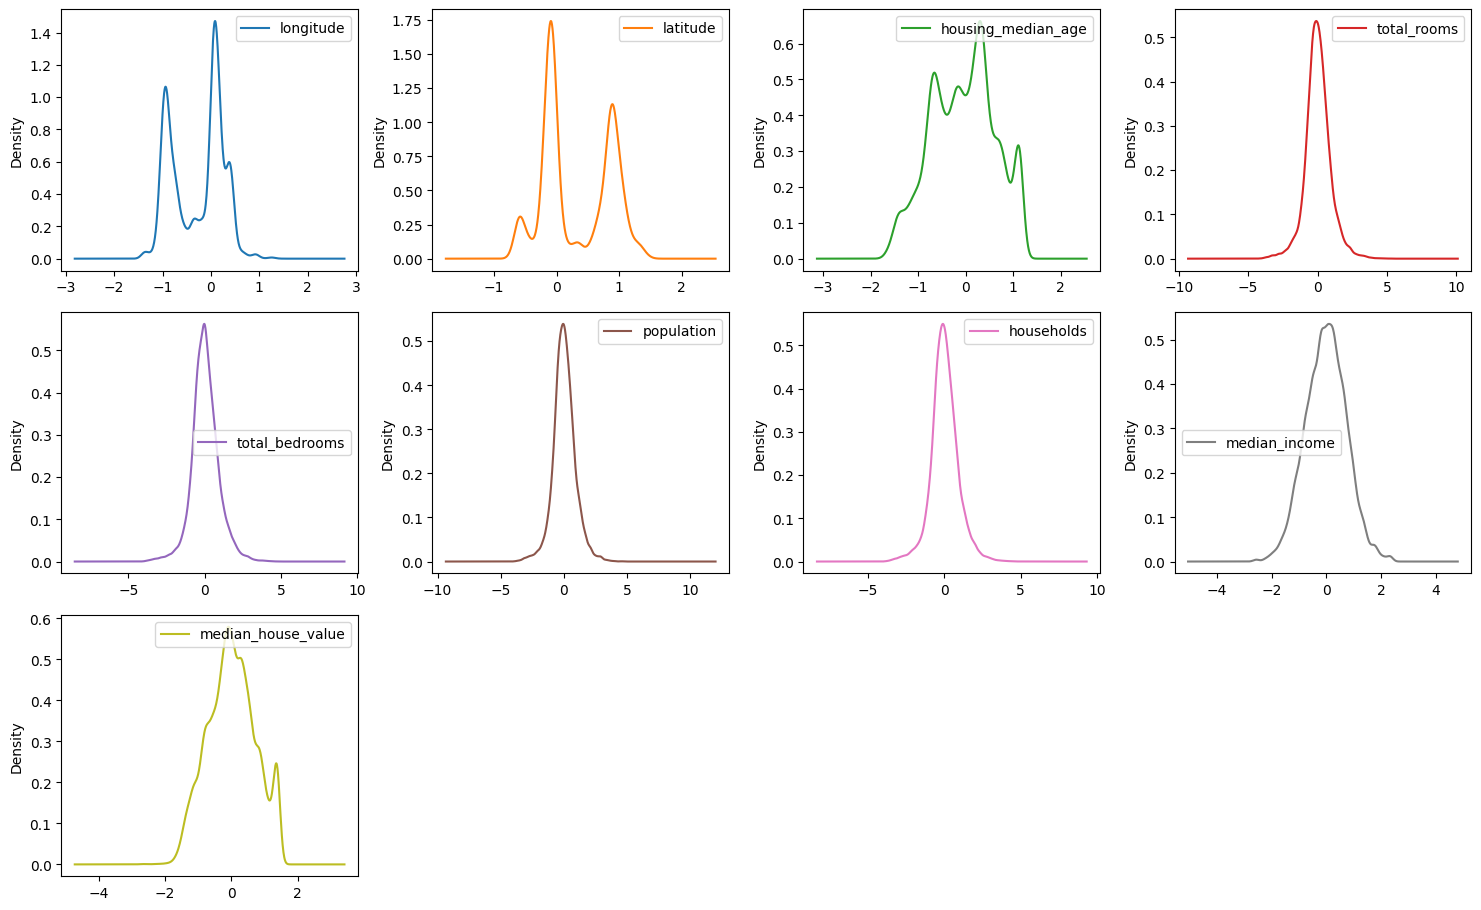

In [ ]:
scaler = RobustScaler()
scaled_df = scaler.fit_transform(transformed_df)
scaled_df = pd.DataFrame(scaled_df, columns=transformed_df.columns)
scaled_df.plot(kind='kde',subplots=True, layout=(4,4), figsize=(15,12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Here we have scaled the features so that they do not affect the distance based models.

## **6. ENCODING**

In [ ]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = ohe.fit_transform(df[['ocean_proximity']])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['ocean_proximity']))

In [ ]:
new_df = pd.concat([scaled_df, encoded_df], axis=1)
new_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.960317,0.915416,0.601889,-1.030718,-1.376249,-1.413663,-1.326296,1.406118,1.233231,0.0,0.0,0.0,1.0,0.0
1,-0.960317,0.911747,-0.427041,1.772708,1.337173,1.001578,1.501242,1.401481,0.908523,0.0,0.0,0.0,1.0,0.0
2,-0.960317,0.909909,1.124753,-0.458343,-0.977423,-0.985821,-0.981494,1.182812,0.883819,0.0,0.0,0.0,1.0,0.0
3,-0.960317,0.909909,1.124753,-0.622807,-0.743419,-0.861435,-0.750500,0.769677,0.841226,0.0,0.0,0.0,1.0,0.0
4,-0.960317,0.909909,1.124753,-0.334360,-0.542078,-0.848067,-0.559925,0.138111,0.844820,0.0,0.0,0.0,1.0,0.0


In [ ]:
new_df.shape

(20640, 14)

We have applied One Hot Encoding on categorical feature (ocean_proximity) as machin learning model in regression reqire all feature in numerical format. Due to this encoding features have also increase to 14.

# **PART 2: MODEL DEVELOPMENT, COMPARISON, VALIDATION, AND DIAGNOSTICS**

## **1. MODEL FITTING AND COMPARISON**

In [ ]:
X_columns = [col for col in new_df if col != 'median_house_value']
X = new_df[X_columns]
y = new_df['median_house_value']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0, random_state=42)
lasso_model = Lasso(alpha=0.01, random_state=42)
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
gbr_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)

lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

y_pred_LinearRegression = lr_model.predict(X_test)
y_pred_Ridge = ridge_model.predict(X_test)
y_pred_Lasso = lasso_model.predict(X_test)
y_pred_DecisionTree = dt_model.predict(X_test)
y_pred_GradientBoosting = gbr_model.predict(X_test)

metrics = {
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Decision Tree Regression",
        "Gradient Boosting Regression"
    ],

    "R2 Score": [
        r2_score(y_test, y_pred_LinearRegression),
        r2_score(y_test, y_pred_Ridge),
        r2_score(y_test, y_pred_Lasso),
        r2_score(y_test, y_pred_DecisionTree),
        r2_score(y_test, y_pred_GradientBoosting)
    ],

    "MSE": [
        mean_squared_error(y_test, y_pred_LinearRegression),
        mean_squared_error(y_test, y_pred_Ridge),
        mean_squared_error(y_test, y_pred_Lasso),
        mean_squared_error(y_test, y_pred_DecisionTree),
        mean_squared_error(y_test, y_pred_GradientBoosting)
    ]
}
results_df = pd.DataFrame(metrics)

print(results_df)

                          Model  R2 Score       MSE
0             Linear Regression  0.657514  0.174139
1              Ridge Regression  0.657694  0.174048
2              Lasso Regression  0.653560  0.176150
3      Decision Tree Regression  0.657905  0.173941
4  Gradient Boosting Regression  0.824571  0.089198


We have applied both distance based (linear regression, ridge, and lasso regression) and non distance based regression model (like Decision tree, and Gradient Boosting regression). linear, ridge, lasso and decision tree models are giving R square values around **65**, but gradient boosting regression showing more than **82** which shows that it fits the best on this housing price prediction data.


/tmp/ipython-input-524992462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


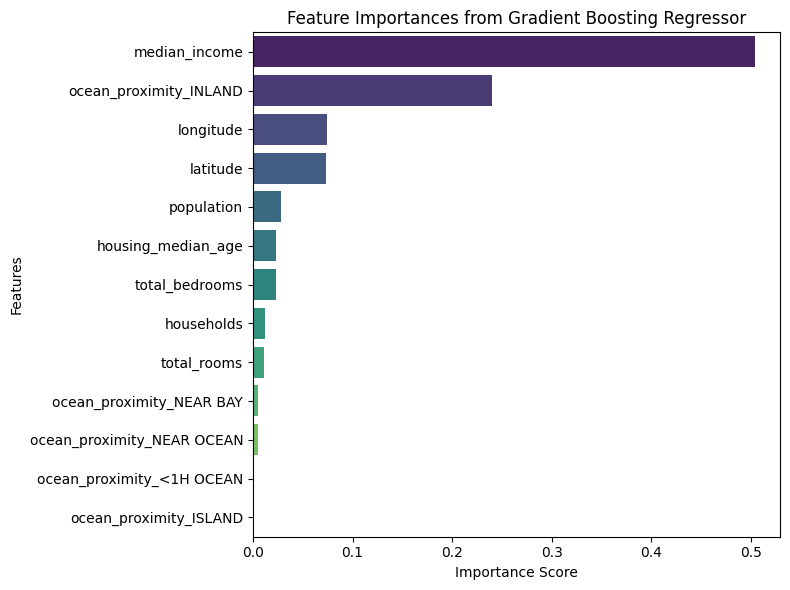

In [ ]:
feature_importances = gbr_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

**Median_income, ocean_proximity_INLAND, longitude, latitude, population, housing median age** are the important features which are used by the model most to predict the median housing price.

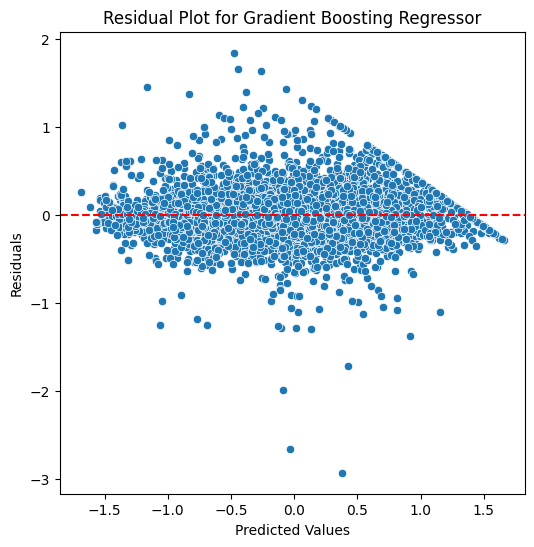

In [ ]:
residuals = y_test - y_pred_GradientBoosting

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_pred_GradientBoosting, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Gradient Boosting Regressor')
plt.show()

The residual plot shows random residuals indicating that **model has picked the pattern correctly**. Is also shows **little heteroscedasticity** as it shows a **cone like pattern when predicted values increases**. It shows that **points are symatrically placed on both side of the red line**, showing **unbiasness** of the model. Random scalttered points also indicate that **model does not follows and curve or pattern** which means **model is not underfit.**

## **2. MULTICOLLINEARITY TEST**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

X_vif = new_df.drop(['median_house_value', 'ocean_proximity_NEAR OCEAN'], axis=1)

X_vif_const = add_constant(X_vif)
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

# Display VIF values, sorting them for easier interpretation
print("Variance Inflation Factor (VIF) values:")
print(vif_data.sort_values(by='VIF', ascending=False))

Variance Inflation Factor (VIF) values:
                      feature        VIF
2                    latitude  31.712640
7                  households  30.686743
5              total_bedrooms  29.778264
1                   longitude  27.699703
4                 total_rooms  20.812233
0                       const  10.510495
6                  population   7.696176
10     ocean_proximity_INLAND   6.871887
9   ocean_proximity_<1H OCEAN   2.979741
8               median_income   2.641617
12   ocean_proximity_NEAR BAY   2.193258
3          housing_median_age   1.312538
11     ocean_proximity_ISLAND   1.003982


It is visible that features like **latitude, longitude, total bedrooms, households and total rooms** have high multicollinearity. Thus in further process we will apply pca upon most collinear features and then will check the validation of the model.

## **3. ITERATION ONE**

In [ ]:
from sklearn.decomposition import PCA
housing_features = new_df[['households', 'total_bedrooms', 'total_rooms']]
pca_housing = PCA(n_components=1)
pca_housing = pca_housing.fit_transform(housing_features)
new_df['pca_housing'] = pca_housing
new_df = new_df.drop(columns=['households', 'total_bedrooms', 'total_rooms'])

print("Shape of new_df after PCA: ", new_df.shape)
print("First 5 rows of new_df with principal component:")
print(new_df.head())

Shape of new_df after PCA:  (20640, 12)
First 5 rows of new_df with principal component:
   longitude  latitude  housing_median_age  population  median_income  \
0  -0.960317  0.915416            0.601889   -1.413663       1.406118   
1  -0.960317  0.911747           -0.427041    1.001578       1.401481   
2  -0.960317  0.909909            1.124753   -0.985821       1.182812   
3  -0.960317  0.909909            1.124753   -0.861435       0.769677   
4  -0.960317  0.909909            1.124753   -0.848067       0.138111   

   median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0            1.233231                        0.0                     0.0   
1            0.908523                        0.0                     0.0   
2            0.883819                        0.0                     0.0   
3            0.841226                        0.0                     0.0   
4            0.844820                        0.0                     0.0   

   ocean_proxim

Here we have applied pca on **'households', 'total_bedrooms', 'total_rooms'** and make it a principal componant naming **pca_housing**.

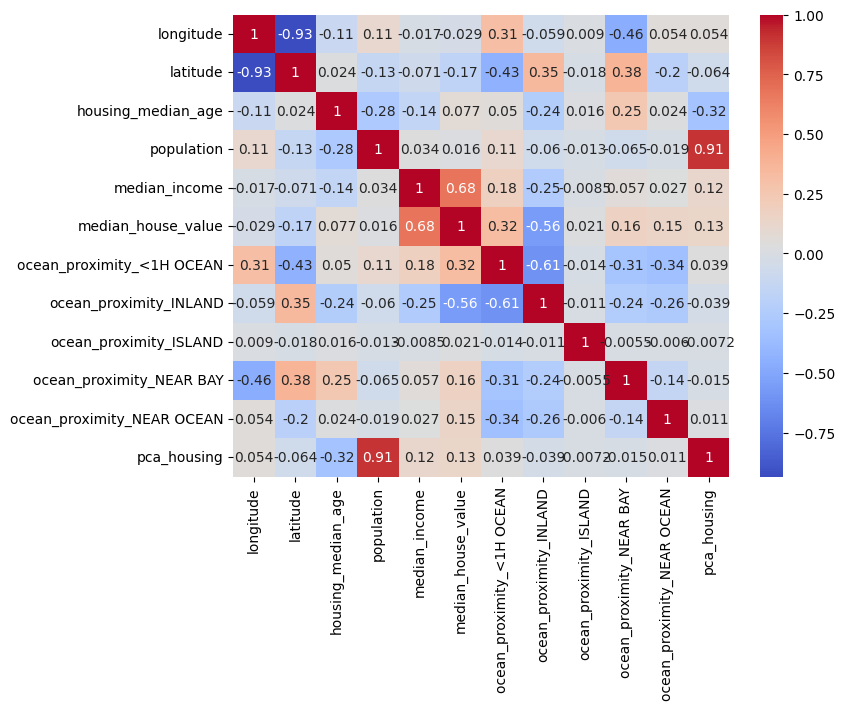

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Here we can see most of the features are independent except population with pca_housing.

In [ ]:
X1 = new_df.drop('median_house_value', axis=1)
Y1 = new_df['median_house_value']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
ridge = Ridge(alpha=1.0, random_state=42)
lasso = Lasso(alpha=0.01, random_state=42)
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)

lr.fit(X_train1, y_train1)
ridge.fit(X_train1, y_train1)
lasso.fit(X_train1, y_train1)
dt.fit(X_train1, y_train1)
gbr.fit(X_train1, y_train1)

y_pred_lr = lr.predict(X_test1)
y_pred_rd = ridge.predict(X_test1)
y_pred_ls = lasso.predict(X_test1)
y_pred_dt = dt.predict(X_test1)
y_pred_gbr = gbr.predict(X_test1)

metrics1 = {
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Decision Tree Regression",
        "Gradient Boosting Regression"
    ],

    "R2 Score": [
        r2_score(y_test1, y_pred_lr),
        r2_score(y_test1, y_pred_rd),
        r2_score(y_test1, y_pred_ls),
        r2_score(y_test1, y_pred_dt),
        r2_score(y_test1, y_pred_gbr)
    ],

    "MSE": [
        mean_squared_error(y_test1, y_pred_lr),
        mean_squared_error(y_test1, y_pred_rd),
        mean_squared_error(y_test1, y_pred_ls),
        mean_squared_error(y_test1, y_pred_dt),
        mean_squared_error(y_test1, y_pred_gbr)
    ]
}
results_df1 = pd.DataFrame(metrics1)

print(results_df1)

                          Model  R2 Score       MSE
0             Linear Regression  0.666516  0.169562
1              Ridge Regression  0.666516  0.169562
2              Lasso Regression  0.651526  0.177184
3      Decision Tree Regression  0.658141  0.173820
4  Gradient Boosting Regression  0.826044  0.088449


As we have applied pca on **'households', 'total_bedrooms', 'total_rooms'** the Validation scores of the model have imporoved. It shows that pca reduced the **multicollinearity and noise of the features, and avoided overfitting of the model**.It helped the model in learning the data more accurately.

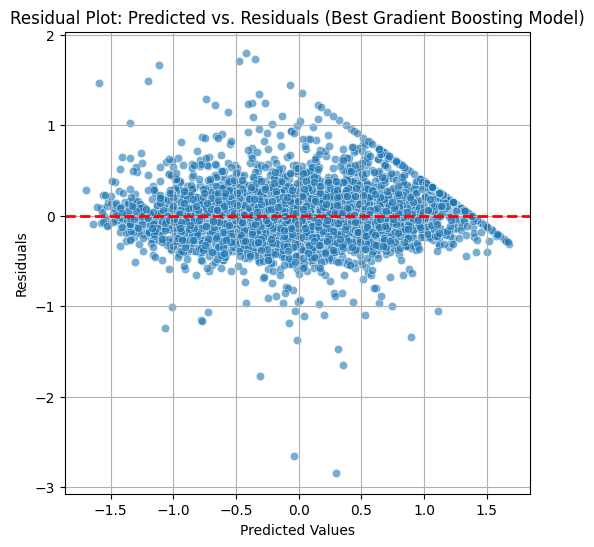

In [ ]:
residuals = y_test1 - y_pred_gbr

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_pred_gbr, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot: Predicted vs. Residuals (Best Gradient Boosting Model)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Residual plot is showing the similar kind of patterns as discussed above.

## **4. ITERATION TWO**

In [ ]:
geographical_features = new_df[['latitude', 'longitude']]
pca = PCA(n_components=1)

principal_component_geo = pca.fit_transform(geographical_features)

principal_component_df = pd.DataFrame(principal_component_geo, columns=['location'])
new_df = pd.concat([new_df.drop(columns=['latitude', 'longitude']), principal_component_df], axis=1)

X2 = new_df.drop('median_house_value', axis=1)
Y2 = new_df['median_house_value']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

lr2 = LinearRegression()
ridge2 = Ridge(alpha=1.0, random_state=42)
lasso2 = Lasso(alpha=0.01, random_state=42)
dt2 = DecisionTreeRegressor(max_depth=5, random_state=42)
gbr2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)

lr2.fit(X_train2, y_train2)
ridge2.fit(X_train2, y_train2)
lasso2.fit(X_train2, y_train2)
dt2.fit(X_train2, y_train2)
gbr2.fit(X_train2, y_train2)

y_pred_lr2 = lr2.predict(X_test2)
y_pred_rd2 = ridge2.predict(X_test2)
y_pred_ls2 = lasso2.predict(X_test2)
y_pred_dt2 = dt2.predict(X_test2)
y_pred_gbr2 = gbr2.predict(X_test2)

metrics2 = {
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Decision Tree Regression",
        "Gradient Boosting Regression"
    ],

    "R2 Score": [
        r2_score(y_test2, y_pred_lr2),
        r2_score(y_test2, y_pred_rd2),
        r2_score(y_test2, y_pred_ls2),
        r2_score(y_test2, y_pred_dt2),
        r2_score(y_test2, y_pred_gbr2)
    ],

    "MSE": [
        mean_squared_error(y_test2, y_pred_lr2),
        mean_squared_error(y_test2, y_pred_lr2),
        mean_squared_error(y_test2, y_pred_lr2),
        mean_squared_error(y_test2, y_pred_lr2),
        mean_squared_error(y_test2, y_pred_lr2)
    ]
}
results_df2 = pd.DataFrame(metrics2)

print(results_df2)


                          Model  R2 Score       MSE
0             Linear Regression  0.655551  0.175137
1              Ridge Regression  0.655511  0.175137
2              Lasso Regression  0.651526  0.175137
3      Decision Tree Regression  0.649893  0.175137
4  Gradient Boosting Regression  0.791572  0.175137


Here we have fit the model after applying d**imensionality reduction on 'latitude' and 'longitude'.** Validation score (**r2, and mse**) of this model shows **a little drop** which shows that 'latitude', 'longitude' are important features for the model. It clearly shows that **price of the houses depends upon location** strongly.

# **Part 3: INTERPRETATION, INSIGHTS, LIMITATIONS, AND RECOMMENDATIONS**



I have used Linear, Ridge, Lasso, Random Forest and Gradient Boosting Regression Machine Learning models to trains the data. **r2 score, MSE** of the first four models are **Linear Regression  (0.65, 0.17), Ridge Regression (0.65, 0.17), Lasso Regression (0.65, 0.17), Decision Tree Regression (0.65, 0.17)** whereas they are **(0.82, 0.089)** for the **Gradient Boosting Regression**.It shows that the Gradient Boosting model fit well on the data. I have also iterated the ML process by amending the features to find the best accuracy.

To do the first iteration I apply **dimensionality reduction** method using **Principal componant analysis** on high multicollinear features like **'households', 'total_bedrooms', 'total_rooms'**. The accuracy**(r2 and MSE)** of the all models increase that is  -- **Linear Regression (0.66, 0.16), Ridge Regression (.66, 0.16), Lasso Regression (0.65, 0.17),** **Decision Tree Regression (0.65, 0.17), Gradient Boosting Regression (0.82, 0.08) **

In the second iteration I have apply Pca on latitude and longitude and have trained the data on all models. The accuracy score at this time are  **Linear Regression (0.65, 0.17), Ridge Regression (0.65, 0.17), Lasso Regression (0.65, 0.17), Decision Tree Regression (0.64, 0.17), Gradient Boosting Regression (0.79, 0.17)**

Thus we shall apply PCA only on 'households', 'total_bedrooms', 'total_rooms' and will choose the **Gradient Boosting Regression ML model** for further process like hyperparameter tuning to improve accuracy more.

I have drawn **residual plot for the Gradient Boosting Regression model** to check its health. It shows the **randomly scattered residual error points** which means **model is best fitted to the data**. Residual errors are also **eqally distributed along the red line** showing unbiasness of the model. It also shows that model is train on majority of the data, and is **not underfitted**. However with the **increase of predicted values residual point concentrate in the cone shape** which shows **heterosedesticity**. Although it is not a big problem for tree based model like gradient boosting as they do not work on variance or distance.

After doing EDA and finding feature importance from the Gradient Boosting model, I have found that **median income** is the most important factor followed by **ocean proximity inland, latitude, longitude and population etc** in deciding the price of the house.
I have also found that **population density is more in the coastal areas** than it is in the hinterland. I have also found that **price of the house is more in the coastal areas** which indirectly also shows that **more rich people live near the coast** than in the hinterland.


Limitations: Data has **high multicollinear features** which cause **overfitting of the model and requires high computation power to train the data**. It also has various **outliers** which make the dataset **unfit to train on the distance based model**. Dimensions of the data are also few which may not be enough to get high accuracy from the Machin Learning model.